#### Name : Stuti Upadhyay
#### Campus ID : XT81177
#### Instructor : Chalachew Jemberie

Mathematical Background Review( Please review this note below)
--------------------------------------------------------------------------------------------------

### Derivation of the Linear Regression Coefficients Using Least Squares

The goal of linear regression is to find the set of coefficients (\\(\beta\\)) that minimizes the sum of squared residuals, which is the difference between the observed values and those predicted by the model. This is known as the Least Squares criterion.

#### Objective Function

The objective function to minimize in the case of linear regression is the sum of squared residuals:

\\[
S = \sum_{i=1}^n (y_i - \hat{y}_i)^2
\\]

Where:
- \\( y_i \\) is the observed value.
- \\( \hat{y}_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \dots + \beta_n x_{ni} \\) is the predicted value using the model.

#### Matrix Formulation

For multiple regression involving several variables, the model can be expressed in matrix terms. Let \\( X \\) be the matrix of input features with each row corresponding to an observation and each column to a variable, and \\( \beta \\) be the column vector of coefficients, including the intercept. The model can be written as:

\\[
\hat{Y} = X\beta
\\]

Where \\( \hat{Y} \\) is the vector of predicted values.

#### Cost Function in Matrix Form

The sum of squared residuals can then be expressed as:

\\[
S = (Y - X\beta)^T (Y - X\beta)
\\]

Where \\( Y \\) is the column vector of observed values.

#### Minimization and Solution

To find the coefficients that minimize \\( S \\), we take the derivative of \\( S \\) with respect to \\( \beta \\), set it to zero, and solve for \\( \beta \\):

\\[
\frac{\partial S}{\partial \beta} = -2X^T(Y - X\beta) = 0
\\]

This leads to the normal equations:

\\[
X^T Y = X^T X \beta
\\]

Solving for \\( \beta \\) gives:

\\[
\beta = (X^T X)^{-1} X^T Y
\\]

This is the closed-form solution for the coefficients of a linear regression model under the Least Squares criterion.

### Interpretation

The solution \\( \beta = (X^T X)^{-1} X^T Y \\) is feasible as long as \\( X^T X \\) is non-singular (i.e., has an inverse). If \\( X^T X \\) is singular, alternative methods like ridge regression or singular value decomposition (SVD) might be used to solve the regression problem.


Intercept: 4.22, Slope: 2.97


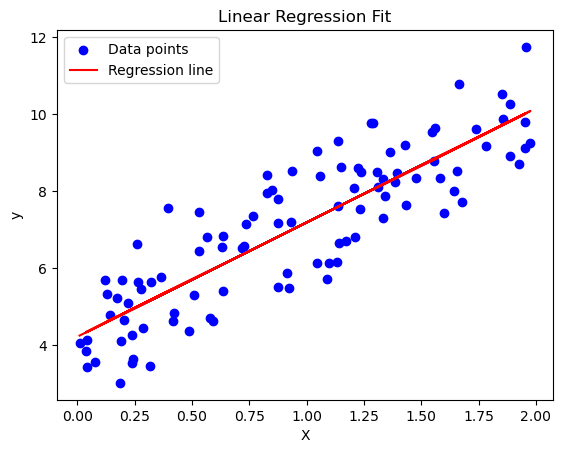

In [1]:
### Python Example for Solving Linear Regression

# Let's solve a simple linear regression problem using Python. We'll use synthetic data for illustration:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generating synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Creating the linear regression model
model = LinearRegression()
model.fit(X, y)

# Coefficients
intercept = model.intercept_[0]
slope = model.coef_[0][0]

# Displaying results
print(f"Intercept: {intercept:.2f}, Slope: {slope:.2f}")

# Plotting the results
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

### Gradient Descent for Linear Regression Optimization

Gradient descent is a widely used optimization technique in machine learning, particularly suitable for finding the minimum of a function. In the context of linear regression, it is employed to minimize the cost function, typically the sum of squared residuals, by iteratively updating the model parameters.

#### Concept and Steps

1. **Initialize Parameters**: Begin with initial guesses for the parameters (coefficients).
2. **Compute Gradient**: Calculate the gradient of the cost function with respect to each parameter.
3. **Update Parameters**: Adjust the parameters by moving in the opposite direction of the gradient.
4. **Repeat**: Continue the process until the cost function converges to a minimum.

#### Mathematical Formulation

For a simple linear regression model \( y = \beta_0 + \beta_1 x \), we define the cost function (mean squared error) as:

\\[
J(\beta_0, \beta_1) = \frac{1}{2n} \sum_{i=1}^n (y_i - (\beta_0 + \beta_1 x_i))^2
\\]

Where \( n \) is the number of observations.

The gradients of \( J \) with respect to \( \beta_0 \) and \( \beta_1 \) are:

\\[
\frac{\partial J}{\partial \beta_0} = \frac{1}{n} \sum_{i=1}^n -(y_i - (\beta_0 + \beta_1 x_i))
\\]

\\[
\frac{\partial J}{\partial \beta_1} = \frac{1}{n} \sum_{i=1}^n -(y_i - (\beta_0 + \beta_1 x_i)) x_i
\\]

#### Update Rules
The update rules using a learning rate \( \alpha \) (a small positive number) are:

\\[
\beta_0 := \beta_0 - \alpha \frac{\partial J}{\partial \beta_0}
\\]

\\[
\beta_1 := \beta_1 - \alpha \frac{\partial J}{\partial \beta_1}
\\]

### Python Example Implementing Gradient Descent

Here's a simple Python script that uses gradient descent to find the optimal coefficients for a linear regression model with one predictor:

```python
import numpy as np

# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1).flatten()

# Parameters
learning_rate = 0.01
n_iterations = 1000
n = len(y)

# Initial parameters
beta_0 = 0
beta_1 = 0

# Gradient Descent
for _ in range(n_iterations):
    y_pred = beta_0 + beta_1 * X.flatten()
    dJ_dbeta_0 = -2/n * sum(y - y_pred)
    dJ_dbeta_1 = -2/n * sum((y - y_pred) * X.flatten())
    beta_0 = beta_0 - learning_rate * dJ_dbeta_0
    beta_1 = beta_1 - learning_rate * dJ_dbeta_1

print(f"Learned parameters: beta_0 = {beta_0}, beta_1 = {beta_1}")


In [2]:
import numpy as np

# Generate some sample data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1).flatten()

# Parameters
learning_rate = 0.01
n_iterations = 1000
n = len(y)

# Initial parameters
beta_0 = 0
beta_1 = 0

# Gradient Descent
for _ in range(n_iterations):
    y_pred = beta_0 + beta_1 * X.flatten()
    dJ_dbeta_0 = -2/n * sum(y - y_pred)
    dJ_dbeta_1 = -2/n * sum((y - y_pred) * X.flatten())
    beta_0 = beta_0 - learning_rate * dJ_dbeta_0
    beta_1 = beta_1 - learning_rate * dJ_dbeta_1

print(f"Learned parameters: beta_0 = {beta_0}, beta_1 = {beta_1}")

Learned parameters: beta_0 = [2.57241095 2.54025998 2.97657894 2.42299406 4.84594716 3.27222886
 4.53899157 1.59215029 1.22301582 4.96893589 1.83433414 3.80345204
 3.07549773 1.76497614 7.0508124  7.3210255  6.83608513 2.28533805
 2.03490584 1.79724909 1.80507536 1.54418971 3.00578859 2.27127717
 5.36352184 3.32843013 5.93526163 1.33256995 4.19264529 4.92794511
 6.80047105 2.27880359 3.2612355  3.81546248 6.55949616 3.02436212
 3.11529487 2.6489347  1.63301062 2.71338596 4.75495449 3.25249558
 2.42130616 8.04640818 2.21076556 2.38909584 5.43872052 8.14451459
 5.37136213 4.73744387 2.6371892  4.16845105 1.25570881 6.59393906
 5.27954188 6.8049196  2.73939418 5.27480843 3.8682403  4.63584762
 4.85476046 6.93805838 2.57188612 6.94160759 7.98551836 5.04020998
 1.602746   7.6647077  1.44957358 6.14807104 1.40603922 4.55147343
 1.2648865  2.43989633 2.1149468  6.13559542 6.03324771 5.44232576
 4.21180852 6.05739619 4.51330848 5.19805951 7.66010159 2.37290846
 2.45663831 5.99279725 2.78573671

This includes the basic formulation of logistic regression, the logistic function, and the method used for estimating the model parameters, typically through the method of maximum likelihood estimation.

### Mathematical Foundation of Logistic Regression

Logistic regression is a statistical model used primarily for binary classification tasks, though it can be extended to multiclass classification via techniques like one-vs-rest (OvR) or multinomial logistic regression. It predicts the probability that an observation falls into one of two categories.

#### Logistic Function (Sigmoid Function)

The logistic regression model uses the logistic function to bind the output between 0 and 1, effectively modeling a probability:

\\[
\sigma(t) = \frac{1}{1 + e^{-t}}
\\]

Where \( t \) is the linear combination of the input features \( X \) and their corresponding weights \( \beta \), given by \( t = \beta_0 + \beta_1x_1 + \dots + \beta_nx_n \).

#### Model Formulation

In logistic regression, we model the probability that an outcome variable \( Y \) is a particular class (often coded as 1) given the predictors \( X \). The probability that \( Y = 1 \) can be written as:

\\[
P(Y=1|X) = \sigma(X\beta)
\\]

And the probability that \( Y = 0 \) is therefore:

\\[
P(Y=0|X) = 1 - \sigma(X\beta)
\\]

#### Logit Function

The inverse of the logistic function is the logit function, which is the logarithm of the odds of the dependent variable equaling a certain value:

\\[
\text{logit}(p) = \log\left(\frac{p}{1 - p}\right)
\\]

For logistic regression, the logit of the probability of \( Y \) given \( X \) is modeled linearly:

\\[
\log\left(\frac{P(Y=1|X)}{1 - P(Y=1|X)}\right) = X\beta
\\]

#### Cost Function and Maximum Likelihood

The parameters \( \beta \) of the logistic regression model are typically estimated using maximum likelihood estimation (MLE). The likelihood function \( L \) for \( n \) independent observations is:

\\[
L(\beta) = \prod_{i=1}^n P(y_i | x_i; \beta)
\\]

Where \( P(y_i | x_i; \beta) \) is the predicted probability of the observed outcome \( y_i \) given the predictors \( x_i \) and the model parameters \( \beta \). For binary classification, this becomes:

\\[
L(\beta) = \prod_{i=1}^n (\sigma(x_i \beta))^{y_i} (1 - \sigma(x_i \beta))^{1 - y_i}
\\]

The goal is to maximize this likelihood, but it is often easier to maximize the log of the likelihood:

\\[
\ell(\beta) = \sum_{i=1}^n \left[ y_i \log(\sigma(x_i \beta)) + (1 - y_i) \log(1 - \sigma(x_i \beta)) \right]
\\]

#### Optimization

This optimization problem is usually solved using numerical methods such as Newton-Raphson or more commonly in practice, iterative reweighted least squares (IRLS) or gradient descent techniques.



## Linear Regression

### Objective
Linear regression is used to predict a continuous dependent variable based on one or more independent variables.

### Model Formulation
The relationship between the dependent variable \(y\) and independent variables \(X\) is assumed to be linear:
$$
y = \beta_0 + \beta_1x_1 + \dots + \beta_nx_n + \epsilon
$$
where \(\epsilon\) represents the error term, assumed to be normally distributed.

### Cost Function
The most common method for estimating the parameters (\(\beta\)) in linear regression is the Ordinary Least Squares (OLS) method, which minimizes the sum of squared residuals:
$$
J(\beta) = \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

### Solution
The solution can often be obtained analytically using:
$$
\beta = (X^T X)^{-1} X^T Y
$$

## Logistic Regression

### Objective
Logistic regression is used for binary classification tasks, predicting the probability that an observation falls into one of two categories.

### Model Formulation
It models the probability \(p\) that the dependent variable \(Y\) is 1 given the predictors \(X\), using the logistic function:
$$
P(Y=1|X) = \frac{1}{1 + e^{-X\beta}}
$$

### Cost Function
Logistic regression uses a likelihood maximization approach, often implemented as minimizing the logistic loss (or log loss):
$$
J(\beta) = -\sum_{i=1}^n \left[y_i \log(\hat{p}_i) + (1 - y_i) \log(1 - \hat{p}_i)\right]
$$
where \(\hat{p}_i\) is the predicted probability of the outcome being 1.


X_lin shape: (100, 1)
y_lin shape: (100,)


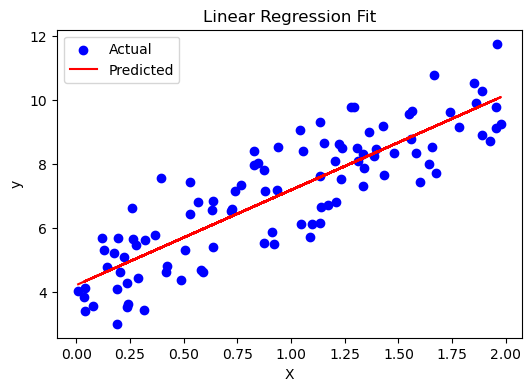

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate some synthetic data
np.random.seed(0)
X_lin = 2 * np.random.rand(100, 1)
y_lin = 4 + 3 * X_lin.squeeze() + np.random.randn(100)  # Ensure y_lin is a 1D array

# Fit the linear regression model
model = LinearRegression()
model.fit(X_lin, y_lin)
y_lin_pred = model.predict(X_lin)

# Check shapes before plotting
print("X_lin shape:", X_lin.shape)
print("y_lin shape:", y_lin.shape)

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(X_lin, y_lin, color='blue', label='Actual')
plt.plot(X_lin, y_lin_pred, color='red', label='Predicted')
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

Linear Regression RMSE: 1.9924
Logistic Regression Accuracy: 0.9800


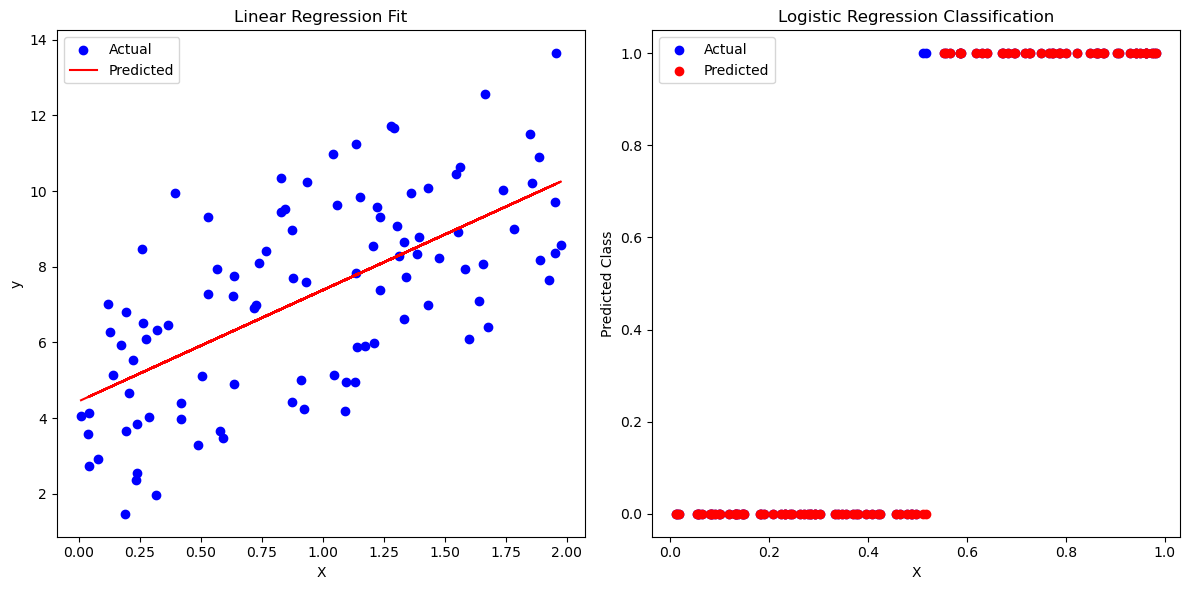

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Setting random seed for reproducibility
np.random.seed(0)

# Generate more realistic synthetic data for linear regression
X_lin = 2 * np.random.rand(100, 1)
y_lin = 4 + 3 * X_lin.squeeze() + np.random.randn(100) * 2  # Adding more noise

# Generate synthetic data for logistic regression
X_log = np.random.rand(100, 1)
y_log = (X_log > 0.5).astype(int).flatten()  # Using int instead of np.int

# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_lin, y_lin)
y_lin_pred = lin_reg.predict(X_lin)
rmse_lin = np.sqrt(mean_squared_error(y_lin, y_lin_pred))

# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_log, y_log)
y_log_pred = log_reg.predict(X_log)
accuracy_log = accuracy_score(y_log, y_log_pred)

# Print performance metrics
print(f"Linear Regression RMSE: {rmse_lin:.4f}")
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_lin, y_lin, color='blue', label='Actual')
plt.plot(X_lin, y_lin_pred, color='red', label='Predicted')
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_log, y_log, color='blue', label='Actual')
plt.scatter(X_log, y_log_pred, color='red', label='Predicted')
plt.title('Logistic Regression Classification')
plt.xlabel('X')
plt.ylabel('Predicted Class')
plt.legend()

plt.tight_layout()
plt.show()

# Conceptual questions 

 
### Linear Regression 

1. **What assumptions must be satisfied for linear regression to provide reliable predictions?**
   - This question probes understanding of linearity, normality, homoscedasticity, independence, and the absence of multicollinearity among predictors.

2. **How does the presence of outliers affect the performance of a linear regression model, and how can these effects be mitigated?**
   - Discuss the impact of outliers on regression coefficients and possible strategies such as robust regression methods or outlier removal.

3. **What is the difference between R-squared and adjusted R-squared in the context of linear regression, and when would you use each?**
   - Explore the concept of these metrics and their importance in the context of model evaluation, especially when adding predictors.

4. **Explain the consequence of multicollinearity in linear regression. How can you detect and address multicollinearity?**
   - Discuss the issues it causes, such as inflated variances of regression coefficients, and techniques for detection like VIF (Variance Inflation Factor).

5. **Can linear regression be used for time series data? What are the specific concerns and adjustments that should be considered?**
   - Investigate issues such as autocorrelation and non-stationarity, and modifications like using differencing or adding lag variables.





### Logistic Regression Conceptual Questions

1. **Why is logistic regression preferred over linear regression for binary classification tasks?**
   - Explore into why logistic regression's output (probabilities) is more suitable for categorical outcomes and how it handles the bounded nature of binary data.

2. **What is the logistic function and how does it relate to the odds ratio in logistic regression?**
   - Explain the S-shaped curve of the logistic function and its role in converting log-odds to probabilities.

3. **Discuss how the likelihood function is used in logistic regression. What does it mean to 'maximize the likelihood'?**
   - Cover the concept of likelihood in the context of fitting a logistic regression model and how it leads to finding the most probable parameters for the given data.

4. **Can logistic regression be extended to handle multi-class classification problems? If so, how?**
   - Examine extensions of logistic regression like multinomial logistic regression and the one-vs-rest strategy.

5. **What are the implications of using logistic regression with highly imbalanced datasets, and how might you overcome them?**
   - Address the challenges of model bias towards the majority class and strategies such as resampling, class-weight adjustments, or using alternative performance metrics.

# Interactive Code Application Excercise 



#### Linear Regression

1. # Implement Cross-Validation
   Prompt**: The snippet below sets up a basic linear regression model. Modify this setup to include 5-fold cross-validation and calculate the average RMSE across all folds. How does this change your confidence in the model's performance?


In [5]:
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error

# Function to calculate RMSE
def rmse(model, X, y):
    y_pred = model.predict(X)
    return np.sqrt(mean_squared_error(y, y_pred))

# Generate synthetic data
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(100)

# Setup KFold
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Cross-validation
# Hint: Use cross_val_score with the rmse function created above

# Interpretation
# Prompt: How does the variation in RMSE across different folds help you understand the model's stability?  

In [6]:
# Linear regression model
model = LinearRegression()

In [7]:
y

array([ 6.12773118,  9.19196269,  8.0822427 ,  5.73305541,  8.03018099,
        9.77125385,  7.80430284,  9.17071317,  8.71122394,  7.35510084,
        8.34717328,  8.39581459,  7.61654234, 10.53021887,  4.78258275,
        5.22934897,  4.13181041, 10.78158957,  8.7958526 ,  9.62206225,
       11.75486075,  7.44719232,  5.49839118,  9.65257177,  3.53652315,
        9.78314731,  4.44650074,  8.92055869,  9.05403196,  7.96848643,
        7.45489263,  9.55144679,  5.87567631,  9.32066865,  3.84473543,
        8.50826938,  8.6198263 ,  7.54659389, 10.27656784,  9.01312847,
        6.53347293,  5.52279093,  8.48402535,  5.68773873,  7.30603243,
        7.87419268,  4.82714181,  6.62282151,  6.56486486,  6.58972646,
        6.65126455,  7.17085827,  9.25591037,  4.64409942,  4.61741446,
        5.6442904 ,  8.49524077,  5.31145086,  7.19387135,  4.37349204,
        3.46255991,  5.10164255,  8.10465103,  5.46412914,  7.56263894,
        7.15683051,  8.01313715,  5.69962394,  7.71176203,  4.11

In [8]:
y_pred

array([5.6716132 , 7.73758952, 7.30242548, 5.30051935, 8.32501523,
       8.73265221, 8.01554261, 6.6568382 , 5.76601042, 7.89121476,
       6.43358609, 8.05920811, 7.04503802, 7.81340207, 7.19312943,
       7.5433362 , 6.84726305, 8.62263353, 6.96367513, 7.2387524 ,
       8.71991373, 5.48900398, 5.56627804, 7.80615975, 5.66363963,
       8.78038422, 6.42314405, 6.08930823, 8.75970506, 8.31727783,
       8.704322  , 7.7428077 , 5.97553735, 8.74682799, 6.56875966,
       7.63921943, 7.784015  , 6.68175294, 7.45084241, 7.75896971,
       7.21318857, 5.73736225, 7.13500121, 8.16314892, 6.14219518,
       6.6871285 , 6.40160949, 8.68602676, 7.50905779, 7.24422487,
       6.06684696, 7.37601223, 6.16243038, 6.86859359, 6.20091696,
       7.51319633, 7.41335385, 6.62846428, 7.23276975, 5.74370153,
       5.34550544, 7.27615473, 7.00343653, 7.47179447, 9.21990781,
       7.78124252, 5.92394081, 7.95377932, 5.52085563, 6.37517843,
       6.76852143, 8.55010576, 6.09200822, 6.0103245 , 6.73831

In [9]:
# Cross-validation with RMSE scoring
rmse_scores = cross_val_score(model, X, y, cv=kf)

In [10]:
# Average RMSE across all folds
avg_rmse = np.mean(rmse_scores)
print("Average RMSE:", avg_rmse)

# Interpretation:
# The variation in RMSE across different folds helps us understand the model's stability.
# A smaller variation indicates that the model performs consistently across different subsets of the data.

Average RMSE: 0.6779362666608056


2. **Incorporate a Categorical Variable**
   - **Prompt**: Below is a code snippet that generates synthetic data for linear regression, including a categorical variable. Convert the categorical variable using one-hot encoding and include it in the linear regression model. Interpret how the inclusion of this variable affects the regression model's coefficients and performance.
   
   - **Task**: Modify the number of categories and observe the change in the model's coefficients. What happens when you add more categories?

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Generate synthetic data
np.random.seed(0)
X_numeric = np.random.rand(100, 1)
X_categorical = np.random.choice(['Category1', 'Category2', 'Category3'], size=100)
y = 4 + 3 * X_numeric.squeeze() + np.random.randn(100)

# Convert categorical variable to one-hot encoding
encoder = OneHotEncoder(sparse=False)
X_categorical_encoded = encoder.fit_transform(X_categorical.reshape(-1, 1))

# Combine numeric and categorical data
X = np.hstack([X_numeric, X_categorical_encoded])

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Display coefficients
print("Model coefficients:", model.coef_)

Model coefficients: [ 2.73168468  0.02819711  0.0456023  -0.07379941]


/Users/stuti_up_02/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Logisitic Regression 



4. **Adjusting the Classification Threshold**
   - **Prompt**: Below is the setup for a logistic regression model. Modify the threshold for classification and observe how it affects the confusion matrix. How does changing the threshold impact the type I and type II error rates?
  


In [12]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Generate synthetic data for logistic regression
np.random.seed(0)
X_log = np.random.rand(100, 1)
y_log = (X_log > 0.5).astype(int).flatten()  # Binary classification

# Logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_log, y_log)
y_log_pred_proba = log_reg.predict_proba(X_log)[:, 1]

# Apply different thresholds
threshold = 0.6  # Try adjusting this value
y_log_pred = (y_log_pred_proba > threshold).astype(int)

# Calculate and display the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_log, y_log_pred))

Confusion Matrix:
 [[51  0]
 [ 8 41]]




5. **Regularization in Logistic Regression**
   - **Prompt**: Adjust the regularization strength (`C`) in the logistic regression model below. Experiment with different values (e.g., 0.01, 0.1, 1, 10, 100) and regularization types (`penalty='l1'`, `penalty='l2'`). Observe how these adjustments affect model accuracy and the number of features with zero coefficients.
   
 


In [13]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic data for logistic regression
np.random.seed(0)
X_log = np.random.rand(100, 1)
y_log = (X_log > 0.5).astype(int).flatten()  # Binary classification

# Logistic regression with regularization
log_reg = LogisticRegression(penalty='l2', C=1, solver='liblinear')
log_reg.fit(X_log, y_log)
y_log_pred = log_reg.predict(X_log)

# Display model accuracy
print("Accuracy:", accuracy_score(y_log, y_log_pred))
print("Non-zero coefficients:", np.sum(log_reg.coef_ != 0))

Accuracy: 0.97
Non-zero coefficients: 1
